# __Classworks and Codes of P452-Computational Physics__

### Importing all the Libraries


In [1]:
from Library_old import *
from Library_Classworks import *
import numpy as np
import scipy as sp
import prettytable as pt
import math as m

## __Numerical Integration__

- Midpoint &#x2612;
- Trapezoidal &#x2612;
- simpsons &#x2611;
- Gaussian Quadrature

### Simpsons Method

In [2]:
########################## Defining the Simpsons Method ##########################
def simp_integ(f,a,b,N):
    h=(b-a)/N
    I=0
    x=a
    while x<=b:
        I+=h/3*(f(x)+4*f(x+h/2)+f(x+h))*0.5
        x+=h
    return I
##################################################################################

######################### Function to find the integral ##########################   
def f(x):
    return x**3-x
##################################################################################

######################### Implementing the simpsons rule #########################
integ=simp_integ(f,0,1.5,1000)
print("The value of the integral is",integ)
##################################################################################

The value of the integral is 0.1406249999999826


### Gaussian Quadrature

## __Solutions of Non-Linear Equations__
-  Bisection &#x2611;
-  Regula Falsi
- Secant Method &#x2611;
-  Fixed Point (single and Multivariable) &#x2611;
-  Newton Raphson (single) &#x2611;
-  Newton Raphson (Multivariable)

### Bracketing

In [3]:
def bracket(a0,b0,f):
    n=0
    while f(a0)*f(b0)>=0:
        if abs(f(a0))>abs(f(b0)):
            b0=b0+1.5*(b0-a0)
        else:
            a0=a0-1.5*(b0-a0)       
    return(a0,b0)

### Bisection Method

In [4]:
######################### Defining the function to solve #########################
def g(x):
    return x*(x+1)
##################################################################################

########################### Defining the Bisection Method ########################
def bijection(a0,b0,f,T):
    a0,b0=bracket(a0,b0,f)
    epsilon=T
    delta=0.001
    count=0
    while (abs(b0-a0))>epsilon:
        c0=(a0+b0)/2
        if f(a0)*f(c0)>0:
            a0=c0
        else:
            b0 = c0 
        count+=1       
    return c0,count 
##################################################################################

####################### Implementing the bisection method ########################
root,iterations=bijection(-0.5,1,g,1e-6)
print("The root of the function is",root)
print("The number of iterations are",iterations)
##################################################################################


The root of the function is 2.384185791015625e-07
The number of iterations are 21


### Secant Method

In [5]:
################## Defining the function to determine the root of ##################
def f(x):
    return x-np.exp(-x**2)*np.cos(2*x)
####################################################################################


############################ Defining the secant Method ############################
def secant_root(f,x0,x1,tol):
    x2=x1-((f(x1)*(x1-x0))/(f(x1)-f(x0)))
    step=1
    while abs(x2-x1)>tol:
        if step>100:
            raise ValueError("The roots are not converging")
            break
        else:
            x0=x1
            x1=x2
            x2=x1-f(x1)*(x1-x0)/(f(x1)-f(x0))
            step+=1
    return x2,step
####################################################################################

################# Implementing the secant method to find the root ##################
root,step=secant_root(f,-1,1,1e-6)
print("The root of the function is: ",root)
print("The number of steps taken to reach the root is: ",step)
####################################################################################

The root of the function is:  0.4710550039754479
The number of steps taken to reach the root is:  6


### Fixed Point Method (For Single Variable Equations)

In [6]:
################## Defining the function to determine the root of ##################
# The function is x^3 - 2x + 5 = 0
# so we can write it as x = (2x - 5)^(1/3)
# g(x) = ((2x - 5)/2)^(1/3)
def g(x):
    return  ((2*x + 5)/2)**(1/3)
####################################################################################

######################### Defining the Fixed Point Method ##########################
def fixed_point_single(g,x0,tol):
    x1=g(x0)
    step=1
    while abs(x1-x0)>tol:
        if step>100:
            print("The roots are not converging")
            break
        else:
            x0=x1
            x1=g(x0)
            step+=1
    return x1,step
####################################################################################

############### Implementing the Fixed Point method to find the root ###############
root,step=fixed_point_single(g,0,1e-6)
print("The root of the function is: ",root)
print("The number of steps taken to reach the root is: ",step)
####################################################################################


The root of the function is:  1.60059852447262
The number of steps taken to reach the root is:  9


### Fixed Point Method (For Multi-Variable Equations)

In [7]:
################## Defining the function to determine the root of ##################
# the set of equations are x^2 + xy = 10 and y + 3xy^2 = 57
# so we can write them as x = (10 - xy)^(1/2) and y = ((57-y)/3x)^0.5
# g1(x,y) = (10 - xy)^(1/2)
# g2(x,y) = ((57-y)/3x)^0.5
def g1(varlist):
    return (10 - varlist[0]*varlist[1])**(1/2)
def g2(varlist):
    return ((57-varlist[1])/(3*varlist[0]))**(1/2)
####################################################################################

######################### Defining the Fixed Point Method ##########################
def fixed_point_multi(glist,x0list,tol):

    if len(glist)!=len(x0list):
        raise IndexError("The number of functions and initial guesses are not equal")
    else:
        for i in range(len(glist)):
            x0list[i] = (glist[i](x0list))
        step=1
        flag=1
        while flag==1:
            if step>100:
                print("The roots are not converging")
                return x0list,step
            else:
                temp = x0list[:]

                for i in range(len(glist)):
                    x0list[i] = (glist[i](x0list))
                step+=1

            for j in range(len(x0list)):
                if abs(temp[j] - x0list[j]) / x0list[j] < tol:
                    flag = 0
                else:
                    flag = 1
                    break
        return x0list,step
####################################################################################

####### Implementing the Fixed Point (Multivariable) method to find the root #######
print(fixed_point_multi([g1,g2],[1.5,3.5],1e-6))
####################################################################################


([2.0000004445530273, 2.9999996370950437], 13)


### Newton Raphson Method (Single Variable)

In [8]:
######################### Defining the Newton's Method (Single Variable) #############################
def newt_rap_single(f,df,x0,tol):
    x1=x0-f(x0)/df(x0)
    step=1
    while abs(x1-x0)>tol:
        if step>100:
            raise ValueError("The roots are not converging")
            break
        else:
            x0=x1
            x1=x0-f(x0)/df(x0)
            step+=1
    return x1,step
########################################################################################################


################################ Defining the function to find the root ################################
def f(x):    # The function is x^3 - 2x + 5 = 0
    return x**3 - 2*x + 5

def df(x):   # The derivative of the function is 3x^2 - 2
    return 3*x**2 - 2
########################################################################################################


################## Implementing the Newton's Method to find the root of the function ##################
root,step=newt_rap_single(f,df,0,1e-6)
print("The root of the function is: ",root)
print("The number of steps taken to reach the root is: ",step)
########################################################################################################

The root of the function is:  -2.0945514815423265
The number of steps taken to reach the root is:  19


### Newton Raphson Method (Multivariable)

## __Solving Differential Equations__
- Foreward Euler &#x2611;
- Backward Euler
- Predictor Corrector &#x2611;
- Runge-kutta (RK2 and RK4) &#x2611;
- Semi implicit Euler
- Verlet Algorithm
- Velocity Verlet
- Leap Frog

### Forward Euler

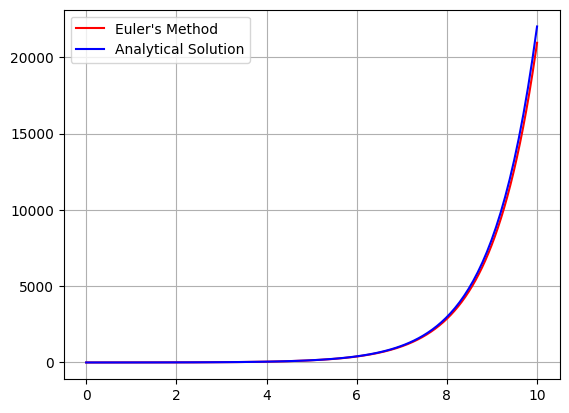

In [9]:
######################## Forward Euler Substitution Method #########################
def euler_forward(dx,x_ini,t_ini,t_final,N):
    dt=(t_final-t_ini)/N
    xlist=[]
    ylist=[]
    t=t_ini
    while t<=t_final:
        xlist.append(t)
        ylist.append(x_ini)
        x_ini+=dt*dx(t,x_ini)
        t+=dt
    return xlist,ylist
####################################################################################

######################### Defining the function to be solved #######################
def df(x,y):    # The differential equation is dy/dx = y
    return y
def f(x):       # The analytical solution is y = e^x    with y(0)=1
    return np.exp(x)
####################################################################################

####################### Implementing the Forward Euler Method ######################
xlist,ylist=euler_forward(df,1,0,10,1000)
x=np.linspace(0,10,100)
y=f(x)
import matplotlib.pyplot as plt
plt.plot(xlist,ylist,label="Euler's Method",color="red")
plt.plot(x,y,label="Analytical Solution",color="blue")
plt.legend()
plt.grid()
plt.show()
####################################################################################

### Backward Euler

### Predictor Corrector

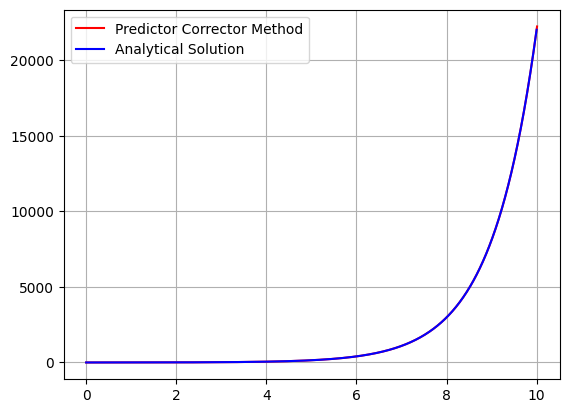

In [10]:
############################ Predictor Corrector Method ############################
def pred_corrector(dybydx,y0,x0,x_f,N):
    h=(x_f-x0)/N
    xlist=[]
    ylist=[]
    x=x0
    y=y0
    xlist.append(x)
    ylist.append(y)
    while x<x_f:
        k1=dybydx(x,y)*h
        k2=dybydx(x+h,y+k1)*h
        y=y+0.5*(k1+k2)
        x=x+h
        xlist.append(x)
        ylist.append(y)
    return xlist,ylist
####################################################################################

######################### Defining the function to be solved #######################
def df(x,y):    # The differential equation is dy/dx = y
    return y
def f(x):       # The analytical solution is y = e^x    with y(0)=1
    return np.exp(x)
####################################################################################

#################### Implementing the Predictor Corrector Method ###################
xl,yl=pred_corrector(df,1,0,10,1000)
x_a=np.linspace(0,10,1000)
y_a=f(x_a)
import matplotlib.pyplot as plt
plt.plot(xl,yl,label="Predictor Corrector Method",color="red")
plt.plot(x_a,y_a,label="Analytical Solution",color="blue")
plt.legend()
plt.grid()
plt.show()
####################################################################################

### $2^{nd}$ Order Runge-Kutta

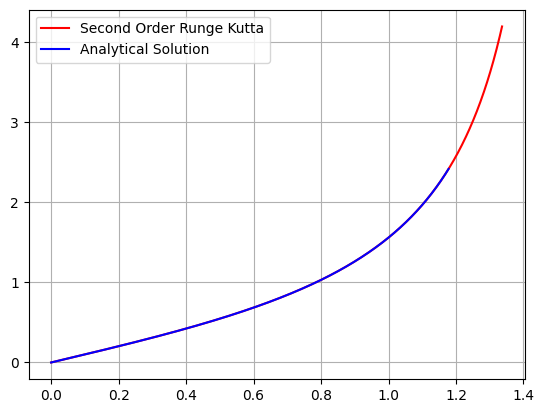

In [11]:
############################# Second Order Runge Kutta #############################
def RK2_solve(dybydx,x0,y0,xf,N):
    h=(xf-x0)/N
    xlist=[]
    ylist=[]
    x=x0
    y=y0
    xlist.append(x)
    ylist.append(y)
    while x<xf:
        k1=h*dybydx(x,y)
        k2=dybydx(x+(h/2),y+(k1/2))*h
        y=y+k2
        x=x+h
        xlist.append(x)
        ylist.append(y)
    return xlist,ylist
####################################################################################    

######################### Defining the function to be solved #######################
def df(x,y):    # The differential equation is dy/dx = y^2 +1
    return (y*y)+1
def f(x):       # The analytical solution is y = -cos(x) + x^3/3
    return np.tan(x)
####################################################################################

#################### Implementing the Second Order Runge Kutta #####################
xl,yl=RK2_solve(df,0,0,1.7*np.pi/4,1000)
x_a=np.linspace(0,1.5*np.pi/4,1000)
y_a=f(x_a)
import matplotlib.pyplot as plt
plt.plot(xl,yl,label="Second Order Runge Kutta",color="red")
plt.plot(x_a,y_a,label="Analytical Solution",color="blue")
plt.legend()
plt.grid()
plt.show()
####################################################################################

### Fourth-order Runge-Kutta (RK4)

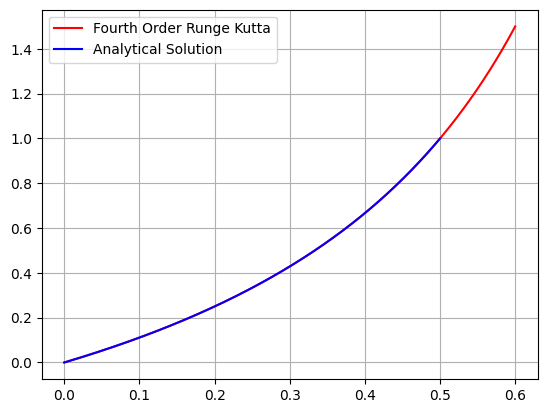

In [12]:
############################# Fourth Order Runge Kutta #############################
def RK4_solve(dybydx,y0,x0,x_f,N):
    h=(x_f-x0)/N
    xlist=[]
    ylist=[]
    x=x0
    y=y0
    xlist.append(x)
    ylist.append(y)
    while x<x_f:
        k1=h*dybydx(x,y)
        k2=h*dybydx(x+(h/2),y+(k1/2))
        k3=h*dybydx(x+(h/2),y+(k2/2))
        k4=h*dybydx(x+h,y+k3)
        y=y+(k1+2*k2+2*k3+k4)/6
        x=x+h
        xlist.append(x)
        ylist.append(y)
    return xlist,ylist    
####################################################################################

######################### Defining the function to be solved #######################
def df(x,y):    # The differential equation is dy/dx = (y+1)^2
    return (y+1)**2
def f(x):       # The analytical solution is y = x/(1-x)
    return x/(1-x)
####################################################################################

#################### Implementing the Fourth Order Runge Kutta #####################
xl,yl=RK4_solve(df,0,0,0.6,1000)
x_a=np.linspace(0,0.5,1000)
y_a=f(x_a)
import matplotlib.pyplot as plt
plt.plot(xl,yl,label="Fourth Order Runge Kutta",color="red")
plt.plot(x_a,y_a,label="Analytical Solution",color="blue")
plt.legend()
plt.grid()
plt.show()
####################################################################################